# AIM: Apply Power Log Transformation, Thresholding and Piecewise Transformation For Image Enhancement

## Name: Arya Shah
## Roll No. E071
## BTech CSBS

# IPPR Lab 02

In [1]:
# Importing Libraries
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [2]:
# Work with 1st image for Power Log Transformation
image_color = io.imread("/content/lenna_grey.jpg")

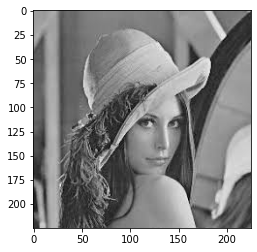

In [3]:
plt.imshow(image_color)

In [4]:
image_color.shape

(225, 225, 3)

It is an RGB Image hence convert to grayscale

In [5]:
image = rgb2gray(image_color)

Grayscale images are typically stored as 8 bits per pixel in files. Multiplying by 255 to stay within the range

In [6]:
image=255*image

In [7]:
image.shape

(225, 225)

In [8]:
sh = image.shape

In [9]:
rows = sh[0]
cols = sh[1]

In [10]:
image_power = image.copy()

In [11]:
g = 0.20

In [12]:
for r in range(rows):
  for c in range(cols):
    temp = image[r][c]
    image_power[r][c] = temp**g

Text(0.5, 1.0, 'Image with less power')

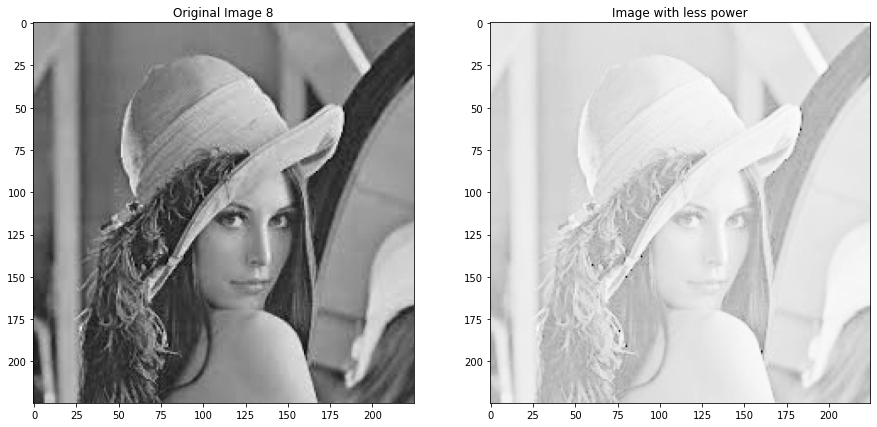

In [13]:
plt.figure(figsize=(15,15)) 
plt.subplot(1,2,1)
plt.imshow(image, cmap ='gray')
plt.title('Original Image 8')
plt.subplot(1,2,2)
plt.imshow(image_power, cmap ='gray')
plt.title('Image with less power')

**Powerlog transformation with g=0.20 is applied and it is oserved that image becomes whiter**

**The whiteness increases as the value decreases**

In [14]:
# Importing Watch Image For Thresholding
image_t = io.imread("/content/watch.png")

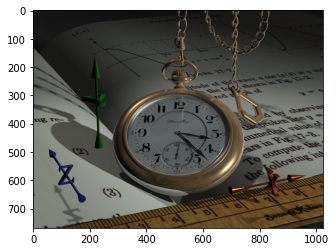

In [15]:
plt.imshow(image_t)

In [16]:
image_t.shape

(768, 1024, 3)

In [17]:
imaget = rgb2gray(image_t)

In [18]:
imaget=255*imaget

In [19]:
imaget.shape

(768, 1024)

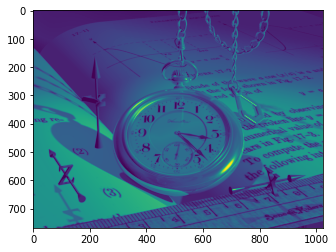

In [20]:
plt.imshow(imaget)

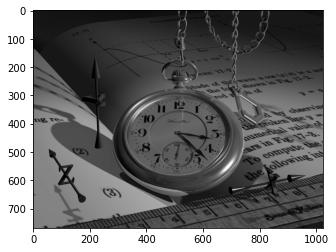

In [21]:
# Showing Above Image In Gray ColorMap
plt.imshow(imaget, cmap ='gray')

In [22]:
'''
Always work on copy of original image. 
This way the original image is not affected by experimentation
'''
image_threshold=imaget.copy()

In [23]:
sh = image_threshold.shape

In [24]:
rows = sh[0]
cols = sh[1]

In [25]:
th=90
for r in range(rows):
  for c in range(cols):
    if image_threshold[r][c]>th:
      image_threshold[r][c] = 255


Text(0.5, 1.0, 'Image with highlight')

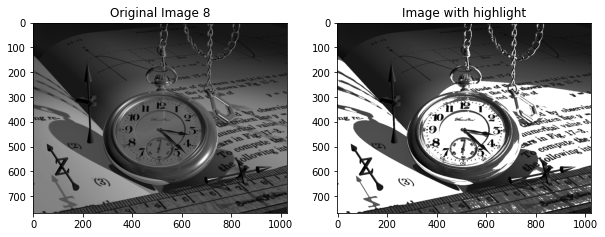

In [26]:
plt.figure(figsize=(10,10)) 
plt.subplot(1,2,1)
plt.imshow(imaget, cmap ='gray')
plt.title('Original Image 8')
plt.subplot(1,2,2)
plt.imshow(image_threshold, cmap ='gray')
plt.title('Image with highlight')

**Thresholding is used to highlight the object of interest. When th=90 is applied and it is observed that the gray shaded area is highlighted while the edges and numbers which are darker are retained in the background.**

**They can either be removed or retained.**


In [27]:
# Pollen Image For Piecewise Thresholding
image_p = io.imread("/content/pollen.tif")

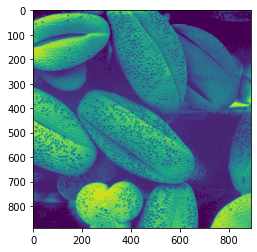

In [28]:
plt.imshow(image_p)

In [29]:
image_p.shape

(889, 889)

In [30]:
imagep = rgb2gray(image_t)

In [31]:
image_p=255*image_p

In [32]:
image_p.shape

(889, 889)

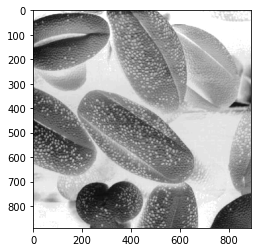

In [33]:
plt.imshow(image_p, cmap ='gray')

Congratulations, above 5 lines are inaccurate and should be avoided. Keep scrolling right below to know why!

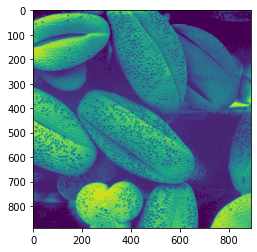

In [34]:
image_piece = io.imread("/content/pollen.tif")
plt.imshow(image_piece)

In [35]:
image_piece.shape

(889, 889)

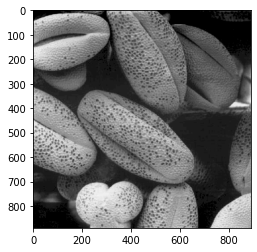

In [36]:
plt.imshow(image_piece, cmap ='gray')

**Reading till here you realize that a stupid mistake was done! If the image is already in gray, then applying rgb2gray() again helps Python F things up for you.**

Pitfall: Never apply rgb2gray to existing gray image if you want to do experiments properly

In [37]:
image_con=image_piece.copy()

In [38]:
sh = image_con.shape

In [39]:
rows = sh[0]
cols = sh[1]

In [40]:
x1=5
x2=155
y1=200
y2=100

In [41]:
m1=y1/x1
m2=(y2-y1)/(x2-x1)
m3=(255-y2)/(255-x1)

In [42]:
for r in range(rows):
  for c in range(cols):
    if image_con[r][c]<x1:
      image_con[r][c] = m1* image_con[r][c]
    elif image_con[r][c]<x2:
      image_con[r][c] = (m2* (image_con[r][c]-x1))+y1
    else:
      image_con[r][c] = (m3* (image_con[r][c]-x2))+y2


Text(0.5, 1.0, 'Image with Piecewise')

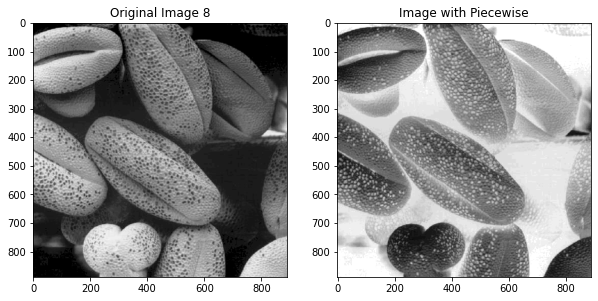

In [43]:
plt.figure(figsize=(10,10)) 
plt.subplot(1,2,1)
plt.imshow(image_piece, cmap ='gray')
plt.title('Original Image 8')
plt.subplot(1,2,2)
plt.imshow(image_con, cmap ='gray')
plt.title('Image with Piecewise')

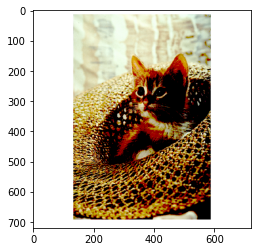

In [44]:
# Performing Piecewise On Cat Image With Threshold Values Given During Lab
image_cat = io.imread("/content/cat_dark.png")
plt.imshow(image_cat)

In [45]:
image_cat.shape

(720, 720, 4)

Spot Something Different?

Cat image has the shape (M, N, 4). 720 and 720 refer to the number of rows and columns of the image. 

4 refers to the image with RGBA values (0–1 float or 0–255 int and including transparency), i.e., values for each of Red, Green, Blue, and Alpha.

In [46]:
# # Converting to Gray
# imagecat = rgb2gray(image_cat)

Running Above Code Cell Is Not Best Practise. Production Level Code Should Never Used Deprecated Functions.

"FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3."

In [47]:
from skimage.color import rgba2rgb

In [48]:
# Following the warning given by the above cell
imagecat = rgb2gray(rgba2rgb(image_cat))

In [49]:
imagecat.shape

(720, 720)

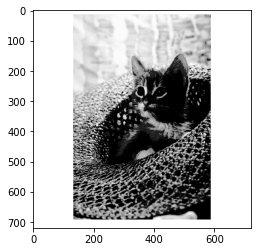

In [50]:
plt.imshow(imagecat, cmap ='gray')

In [51]:
image_cat_1=imagecat.copy()

In [52]:
sh = image_cat_1.shape

In [53]:
rows = sh[0]
cols = sh[1]

In [69]:
x1=50
x2=100
y1=100
y2=200

In [70]:
m1=y1/x1
m2=(y2-y1)/(x2-x1)
m3=(255-y2)/(255-x1)

In [71]:
for r in range(rows):
  for c in range(cols):
    if image_cat_1[r][c]<x1:
      image_cat_1[r][c] = m1* image_cat_1[r][c]
    elif image_cat_1[r][c]<x2:
      image_cat_1[r][c] = (m2* (image_cat_1[r][c]-x1))+y1
    else:
      image_cat_1[r][c] = (m3* (image_cat_1[r][c]-x2))+y2

Text(0.5, 1.0, 'Image with Piecewise')

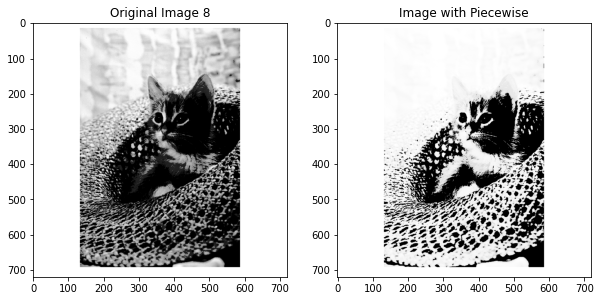

In [72]:
plt.figure(figsize=(10,10)) 
plt.subplot(1,2,1)
plt.imshow(imagecat, cmap ='gray')
plt.title('Original Image 8')
plt.subplot(1,2,2)
plt.imshow(image_cat_1, cmap ='gray')
plt.title('Image with Piecewise')

**After applying piecewise, contrast worsens if selected threshold values are not correct**

**For the given image with low contrast, threshold values are changed. The transformed image with new threshold shows better contrast**